In [63]:
pip install cufflinks

  Attempting uninstall: plotly
    Found existing installation: plotly 3.10.0
    Uninstalling plotly-3.10.0:
      Successfully uninstalled plotly-3.10.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import quandl
import datetime
 
start = datetime.datetime(2015,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
s = "FB"
facebook = quandl.get("WIKI/" + s, start_date=start, end_date=end)

In [8]:
facebook.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,164.80,173.40,163.30,169.39,105350867.0,0.0,1.0,164.80,173.40,163.30,169.39,105350867.0
2018-03-22,166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0
2018-03-23,165.44,167.10,159.02,159.39,52306891.0,0.0,1.0,165.44,167.10,159.02,159.39,52306891.0
2018-03-26,160.82,161.10,149.02,160.06,125438294.0,0.0,1.0,160.82,161.10,149.02,160.06,125438294.0
2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0


Populating the interactive namespace from numpy and matplotlib


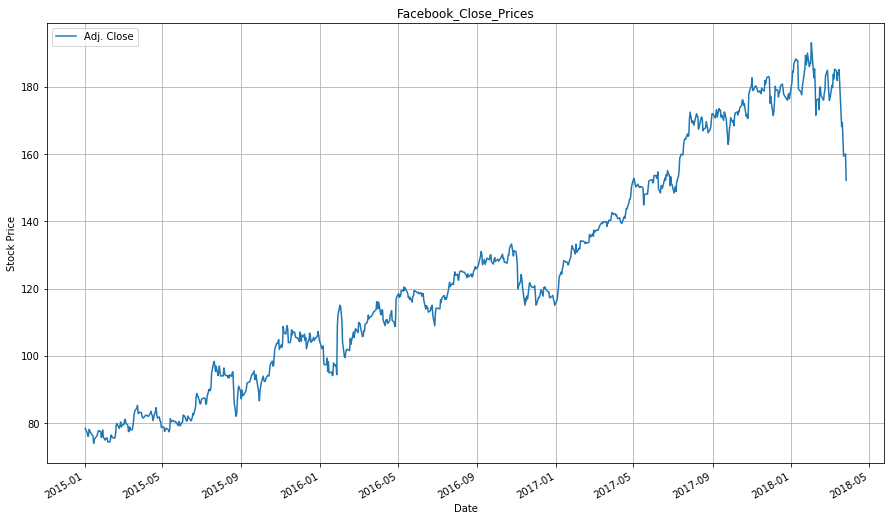

In [9]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
facebook["Adj. Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

plt.ylabel("Stock Price")
plt.title("Facebook_Close_Prices")
plt.legend()
plt.savefig("Facebook.png")

In [10]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8429 sha256=2d8f270f07150835d01fc9407f7d5035f0a78c157c26fa30b253618b127a1fe1
  Stored in directory: C:\Users\jhoff\AppData\Local\Temp\pip-ephem-wheel-cache-h783acqf\wheels\eb\17\99\0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance
Note: you may need to restart the kernel to use updated packages.


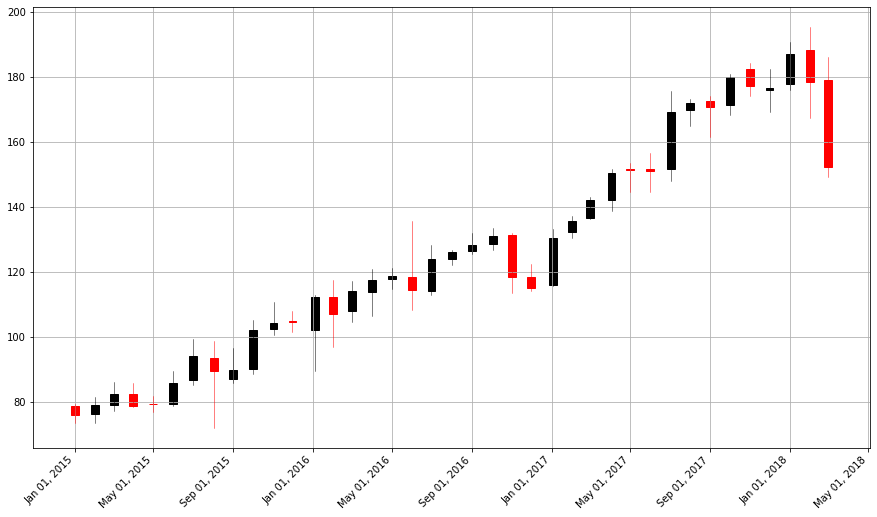

<Figure size 1080x648 with 0 Axes>

In [14]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", adj = False, otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param adj: A boolean indicating whether to use adjusted prices
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    fields = ["Open", "High", "Low", "Close"]
    if adj:
        fields = ["Adj. " + s for s in fields]
    transdat = dat.loc[:,fields]
    transdat.columns = pd.Index(["Open", "High", "Low", "Close"])
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()
pandas_candlestick_ohlc(facebook, adj=True, stick="month")
plt.savefig("candlestick_fb.png")

In [112]:
microsoft, salesforce = (quandl.get("WIKI/" + s, start_date=start, end_date=end) for s in ["MSFT", "CRM"])
 
# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Adj. Close"],
                      "MSFT": microsoft["Adj. Close"],
                      "CRM": salesforce["Adj. Close"],
                      "FB": facebook["Adj. Close"]})
 
stocks.head()

,AAPL,MSFT,CRM,FB
Date,,,,
2015-01-02,103.863957,43.344312,59.24,78.450
2015-01-05,100.937944,42.941088,58.17,77.190
2015-01-06,100.947444,42.315395,57.20,76.150
2015-01-07,102.362951,42.853027,56.93,76.150
2015-01-08,106.295968,44.113683,58.59,78.175


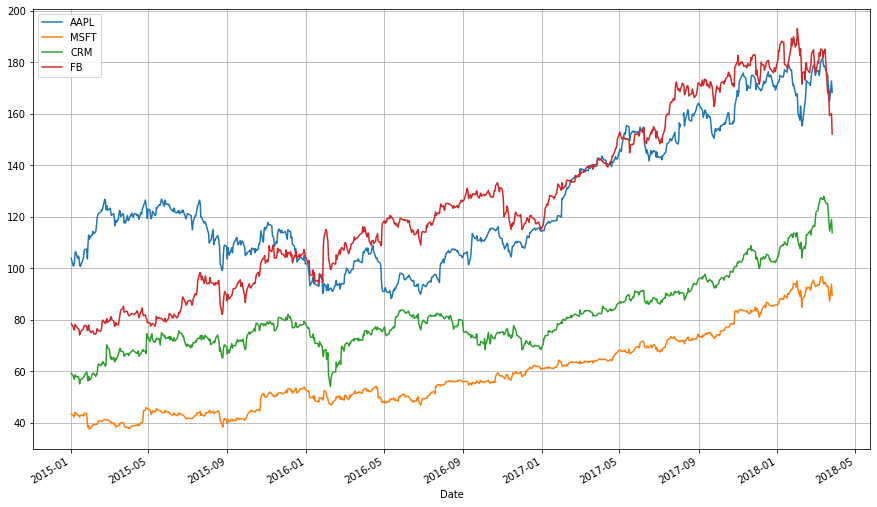

In [113]:
stocks.plot(grid = True)
plt.savefig("4_stocks_1_x_axis.png")

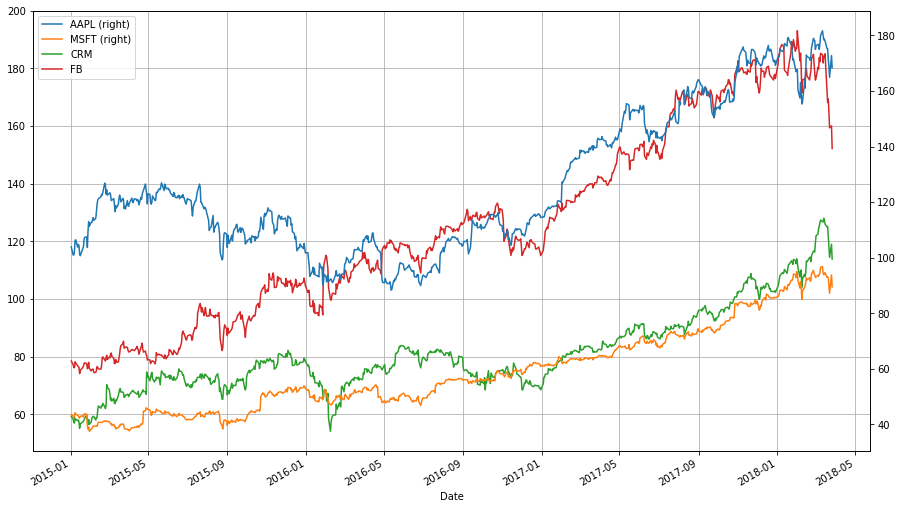

In [114]:
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True)
plt.savefig("4_stocks_2_x_axis.png")

In [22]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df1 = pd.read_csv('AAPL Historical Data.csv')
df2 = pd.read_csv('CVX Historical Data.csv')

fig1 = go.Figure(data=[go.Candlestick(x=df1['Date'],
                open=df1['Open'],
                high=df1['High'],
                low=df1['Low'],
                close=df1['Price'])])

fig2 = go.Figure(data=[go.Candlestick(x=df2['Date'],
                open=df2['Open'],
                high=df2['High'],
                low=df2['Low'],
                close=df2['Price'])])
plt.savefig('candle_interactive.png', dpi=100)
fig1.show()

<Figure size 1080x648 with 0 Axes>

In [125]:
fig2.show()

In [26]:
import investpy
investpy.get_stock_company_profile(stock='aapl', country='united states', language='english')

{'url': 'https://www.investing.com/equities/apple-computer-inc-company-profile',
 'desc': "Apple Inc. designs, manufactures and markets mobile communication and media devices, personal computers and portable digital music players. The Company sells a range of related software, services, accessories, networking solutions, and third-party digital content and applications. The Company's segments include the Americas, Europe, Greater China, Japan and Rest of Asia Pacific. The Americas segment includes both North and South America. The Europe segment includes European countries, India, the Middle East and Africa. The Greater China segment includes China, Hong Kong and Taiwan. The Rest of Asia Pacific segment includes Australia and the Asian countries not included in the Company's other operating segments. Its products and services include iPhone, iPad, Mac, iPod, Apple Watch, Apple TV, a portfolio of consumer and professional software applications, iPhone OS (iOS), OS X and watchOS operatin

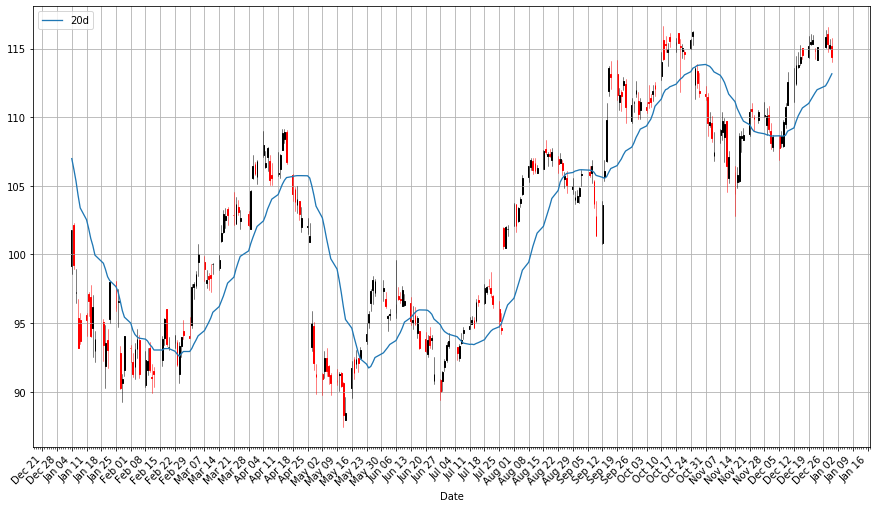

<Figure size 1080x648 with 0 Axes>

In [100]:
apple["20d"] = np.round(apple["Adj. Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-12-31',:], otherseries = "20d", adj=True)
plt.savefig("20day_rolling_moving_avg.png")

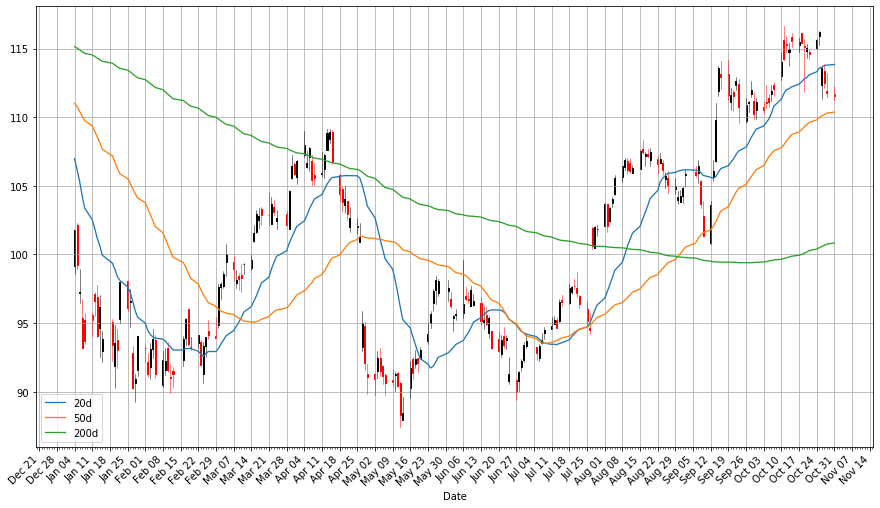

<Figure size 1080x648 with 0 Axes>

In [101]:
apple["50d"] = np.round(apple["Adj. Close"].rolling(window = 50, center = False).mean(), 2)
apple["200d"] = np.round(apple["Adj. Close"].rolling(window = 200, center = False).mean(), 2)
 
pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-10-31',:], otherseries = ["20d", "50d", "200d"], adj=True)
plt.savefig("50day_200day_rolling_moving_avg.png")